# Detección de bordes usando cruces por cero de LoG

En una imagen la detección de bordes se puede realizar utilizando cruces por cero de la imagen filtrada por un Laplaciano de Gauss. Este tipo de filtro permite realzar ciertas características de la imagen que nos permitirán llevar a cabo esta tarea

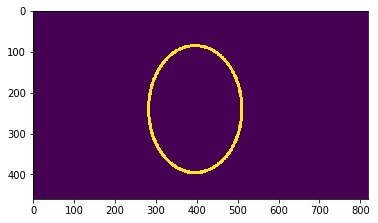

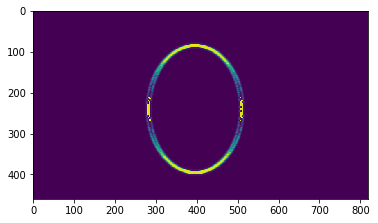

In [3]:
import scipy.ndimage as nd #librería de señales
import numpy as np #librería numérica
import matplotlib.pyplot as plt #librería de graficación
import cv2
from sympy import * #agregamos la libraría simbólica para trabajar con variables
import math

imagen  = cv2.imread('circulo.png',0) # cargamos una imagen de muestra que se encuentra en la librería scipy
plt.imshow(imagen) #visualización de la imagen
plt.show()

LoG = nd.gaussian_laplace(imagen, 2) #aplicación del filtro Laplaciano de Gauss a la imagen de muestra
plt.imshow(LoG) #visualizamos la imagen filtrada
plt.show()

** Actividad 1**

Esta actividad se debe realizar por regiones de la imagen, es decir, no se toma la imagen completa sino que se trabaja por segmentos de filas o columnas de acuerdo a tu consideración.

Para cada segmento de la imagen filtrada encuentra un polinomio interpolador (debes encontrar la ecuación del polinomio) y con alguno de los métodos de solución de ecuaciones determina el cruce por cero de ese polinomio. Crea una imagen totalmente negra de las mismas dimensiones de la imagen que estás trabajando y en el valor de $x$ donde se detecte el cruce por cero asigna un valor de 255 (blanco), de esta forma en la nueva imagen se deben ver los bordes de la imagen filtrada.

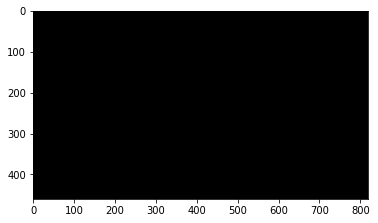

(460, 819)
(460, 819, 3)


In [4]:
#solución para la actividad 1 
imagenFiltrada = np.zeros((imagen.shape[0],imagen.shape[1],3), np.uint8) #crea una imagen negra
plt.imshow(imagenFiltrada) #visualización de la imagen
plt.show()
print(imagen.shape)
print(imagenFiltrada.shape)

In [5]:
def metodoLagrange(datos):
    pixel = 0 #inicializa la var que tendra el resultado de la interpolacion
    grado = len(datos) #grado ingresado por teclado
    x = Symbol('x') #ubica la x en la mitad del vector Y
    
    # formula de interpolacion de Lagrange
    for k in range(grado):
        productoria = 1
        for i in range(grado):
            if (i != k) and i != (x):
                productoria *= ((x) - (i))/((k) - (i))     
        productoria = productoria * datos[k]        
        pixel += productoria
    #print(pixel)
    return pixel

In [6]:
# Metodo de deteccion por cruces de busqueda Incremental
def busquedaIncremental(funcion,puntoInicial,incremento,error,iteraciones):
    fun = vars(math) 
    
    if abs(eval(funcion,fun,{'x': puntoInicial})) <= error:
        return puntoInicial #retorna el punto inicial si es solucion

    puntoNuevo = puntoInicial + incremento # calcula xn segun el metodo
    
    #itera si f(xi) y f(xn) tienen signos iguales o alcanza el maximo de iteraciones
    while eval(funcion,fun,{'x': puntoInicial})*eval(funcion,fun,{'x': puntoNuevo}) > 0 and iteraciones > 0:
        
        puntoInicial = puntoNuevo # aumenta el punto inicial
        puntoNuevo = puntoInicial + incremento # calcula xn segun el metodo
        
        iteraciones -= 1 # reduce en 1 el numero de iteraciones
    
    # mensaje si no enceuntra solucion en las x iteraciones
    if iteraciones == 0:
        return('no se encontro la raiz en el numero maximo de iteraciones')
    
    return puntoNuevo #retorna xn como solucion a f(x)

In [17]:
for i in range(int(imagen.shape[0])):
    numeroDeSegmentos = 149
    gradoPolinomio = int(imagen.shape[1] / numeroDeSegmentos) #6
    
    
    
    pixelInicial = 0
    for j in range (numeroDeSegmentos):
        segmento = imagen[i , pixelInicial:pixelInicial + gradoPolinomio]     

        if sum(1 for i in segmento if i > 0) < gradoPolinomio  and sum(1 for i in segmento if i > 0) > 0 :
            print(segmento)
            indice = busquedaIncremental(str(metodoLagrange(segmento)),0,1,0.01,gradoPolinomio)  
            print(indice)
            if segmento[indice - 1] == 0 :
                try:
                    indice = busquedaIncremental(str(metodoLagrange(segmento)),indice + 1,1, 0.000001,gradoPolinomio)
                except:
                    indice = 0
            imagenFiltrada[i,pixelInicial + indice,:] = 255
        pixelInicial += gradoPolinomio

[  0   0   0 255 255]
0
[255 255 255 255   0]
4
[  0   0   0 255 255]
0
[  0   0   0   0 255]
0
[255 255 255 255   0]
4
[255 255 255   0   0]
3
[  0   0   0 255 255]
0
[255   0   0   0   0]
1
[255 255 255   0   0]
3
[  0   0 255 255 255]
0
[255   0   0   0   0]
1
[255 255 255   0   0]
3
[  0   0   0 255 255]
0
[255 255 255 255   0]
4
[  0   0   0   0 255]
0
[  0 255 255 255 255]
0
[255 255 255 255   0]
4
[  0   0   0   0 255]
0
[255 255 255   0   0]
3
[  0   0   0   0 255]
0
[  0   0   0 255 255]
0
[  0   0 255 255 255]
0
[255 255   0   0   0]
2
[  0 255 255 255 255]
0
[255 255   0   0   0]
2
[255 255 255 255   0]
4
[  0   0   0   0 255]
0
[255 255 255   0   0]
3
[  0   0   0 255 255]
0
[255   0   0   0   0]
1
[  0   0 255 255 255]
0
[  0   0 255 255 255]
0
[255 255 255 255   0]
4
[255   0   0   0   0]
1
[255 255   0   0   0]
2
[  0   0 255 255 255]
0
[255 255 255   0   0]
3
[  0   0   0   0 255]
0
[255 255 255 255   0]
4
[  0   0   0   0 255]
0
[  0   0 255 255 255]
0
[255 255   0   0

[  0   0 255 255 255]
0
[  0   0   0 255 255]
0
[255   0   0   0   0]
1
[  0   0 255 255 255]
0
[  0   0   0 255 255]
0
[255   0   0   0   0]
1
[  0   0 255 255 255]
0
[  0   0   0 255 255]
0
[255   0   0   0   0]
1
[  0   0 255 255 255]
0
[  0   0 255 255 255]
0
[  0   0   0 255 255]
0
[255   0   0   0   0]
1
[  0   0 255 255 255]
0
[  0   0   0 255 255]
0
[255   0   0   0   0]
1
[  0   0 255 255 255]
0
[  0   0   0 255 255]
0
[255   0   0   0   0]
1
[  0   0 255 255 255]
0
[  0   0   0 255 255]
0
[255   0   0   0   0]
1
[  0   0 255 255 255]
0
[  0   0   0 255 255]
0
[255   0   0   0   0]
1
[  0 255 255 255 255]
0
[  0   0   0   0 255]
0
[255 255   0   0   0]
2
[  0 255 255 255 255]
0
[255 255 255 255   0]
4
[  0   0   0   0 255]
0
[255 255   0   0   0]
2
[  0 255 255 255 255]
0
[255 255 255 255   0]
4
[  0   0   0   0 255]
0
[255 255   0   0   0]
2
[  0 255 255 255 255]
0
[255 255 255 255   0]
4
[  0   0   0   0 255]
0
[255 255   0   0   0]
2
[  0 255 255 255 255]
0
[255 255 255 255

0
[255 255 255 255   0]
4
[  0   0   0   0 255]
0
[255 255 255   0   0]
3
[255 255 255 255   0]
4
[  0   0   0   0 255]
0
[255 255 255   0   0]
3
[255 255 255 255   0]
4
[255 255 255   0   0]
3
[255 255 255   0   0]
3
[255 255 255 255   0]
4
[  0   0   0   0 255]
0
[255 255 255   0   0]
3
[  0 255 255 255 255]
0
[255 255 255 255   0]
4
[  0   0   0   0 255]
0
[255 255 255   0   0]
3
[  0 255 255 255 255]
0
[255 255 255 255   0]
4
[  0   0   0   0 255]
0
[255 255   0   0   0]
2
[  0 255 255 255 255]
0
[  0   0   0 255 255]
0
[255 255   0   0   0]
2
[  0   0 255 255 255]
0
[  0   0   0 255 255]
0
[255   0   0   0   0]
1
[  0   0 255 255 255]
0
[255   0   0   0   0]
1
[  0   0 255 255 255]
0
[255   0   0   0   0]
1
[  0   0 255 255 255]
0
[255   0   0   0   0]
1
[  0   0 255 255 255]
0
[255   0   0   0   0]
1
[  0   0   0 255 255]
0
[255   0   0   0   0]
1
[  0   0 255 255 255]
0
[  0   0   0 255 255]
0
[255 255   0   0   0]
2
[  0 255 255 255 255]
0
[  0   0   0   0 255]
0
[255 255   0  

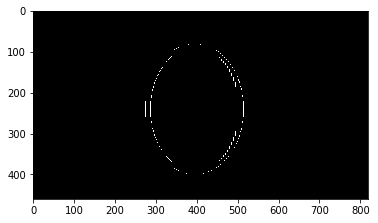

In [8]:
plt.imshow(imagenFiltrada) #visualización de la imagen
plt.show()

In [9]:
numeroDeSegmentos = 149
gradoPolinomio = int(imagen.shape[1] / numeroDeSegmentos) #6
print(gradoPolinomio)
print(imagen[0,0:0+gradoPolinomio])

5
[0 0 0 0 0]


In [30]:
segmento = [0,0,0,0,0,0]
print(str(metodoLagrange(segmento)))
fun = vars(math)
print(eval(str(metodoLagrange(segmento)),fun,{'x':0}))
indice = busquedaIncremental(str(metodoLagrange(segmento)),0,1, 0.000001,gradoPolinomio)
print(indice)

0
0
0


In [31]:
if segmento[indice - 1] == 0 :
    indice = busquedaIncremental(str(metodoLagrange(segmento)),indice + 1,1, 0.000001,gradoPolinomio)
print(indice)

1


In [32]:
if sum(1 for i in segmento if i > 0) < 6  and sum(1 for i in segmento if i > 0) > 0 :
    print('si')